In [20]:
import streamlit as st
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import auto_ts as AT


df2 = pd.read_csv('/Users/weiyushit/Downloads/lifehack/bandungkosong/bandungkosing-aimodel/data.csv')
dep_var = df2['300gm Rib-eye']
dep_var2 = df2['300gm Sirloin']
dep_var3 = df2['Herb Roasted Chicken']
dep_var.plot(legend="True")



ModuleNotFoundError: No module named 'auto_ts'

<AxesSubplot:>

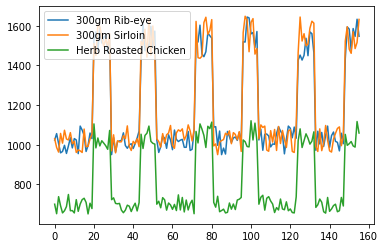

In [12]:
final_df = df2.copy()
final_df=final_df[['Week','300gm Rib-eye','300gm Sirloin','Herb Roasted Chicken']]
final_df[['300gm Rib-eye','300gm Sirloin','Herb Roasted Chicken']].plot()

In [17]:
train = final_df[:140]
test = final_df[140:]
print(train.shape, test.shape)

(140, 4) (16, 4)


In [18]:
ts_column = 'Week' #time series being week
sep = ','
target1 = '300gm Rib-eye'

In [19]:
ml_dict = AT.Auto_Timeseries(train, ts_column,
                            target, sep,  score_type='rmse', forecast_period=6,
                            time_interval='Months', non_seasonal_pdq=None, seasonality=True,
                            seasonal_period=12,seasonal_PDQ=None, model_type='best',
                            verbose=2)

NameError: name 'AT' is not defined

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
#df2 name of dataframe

In [26]:
con=df2['Week']
df2.set_index('Week', inplace=True)
#check datatype of index
df2.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            147, 148, 149, 150, 151, 152, 153, 154, 155, 156],
           dtype='int64', name='Week', length=156)

In [43]:
#convert to time series:
ts = df2['300gm Rib-eye']
ts = df2.iloc
ts